In [1]:
import pandas as pd
import numpy as np

# load data 
df = pd.read_excel('ST2187_coursework_dataset_2020-21.xlsx')

In [2]:
# delete unnecessary columns
bad_columns = ['Row ID', 'Order ID', 'Customer Name', 'State',
               'Postal Code', 'Region', 'Product ID', 'Product Name']

df.drop(bad_columns, axis=1, inplace=True)
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Country,Market,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,United States,US,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,Australia,APAC,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Australia,APAC,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium


In [3]:
# plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
plt.rc('font', size=9)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('axes', titlesize=16)


def get_kv(c):
    temp = df.groupby(c)[c].count()
    k = list(temp.keys())
    v = temp.values
    return k, v


fig, axs = plt.subplots(1, 3, figsize=(16, 4))

k, v = get_kv('Ship Mode')
axs[0].title.set_text('Ship Mode')
axs[0].bar(k, v, color='orange')

k, v = get_kv('Segment')
axs[1].title.set_text('Segment')
axs[1].bar(k, v, color='green');

k, v = get_kv('Category')
axs[2].title.set_text('Category')
axs[2].bar(k, v, color='skyblue');

### What does discount depend on ?

In [4]:
df.groupby('Customer ID')['Discount'].unique()

Customer ID
AA-10315               [0.2, 0.0, 0.15, 0.45, 0.1, 0.25, 0.4]
AA-10375                  [0.0, 0.4, 0.7, 0.1, 0.6, 0.5, 0.2]
AA-10480        [0.17, 0.0, 0.15, 0.2, 0.002, 0.1, 0.45, 0.4]
AA-10645    [0.07, 0.15, 0.1, 0.0, 0.3, 0.17, 0.202, 0.2, ...
AA-315                                             [0.0, 0.6]
                                  ...                        
YS-21880                       [0.2, 0.0, 0.5, 0.1, 0.4, 0.6]
ZC-11910                                                [0.7]
ZC-21910    [0.2, 0.0, 0.4, 0.1, 0.8, 0.27, 0.5, 0.3, 0.6,...
ZD-11925                                      [0.0, 0.7, 0.6]
ZD-21925    [0.002, 0.15, 0.5, 0.2, 0.0, 0.3, 0.35, 0.1, 0...
Name: Discount, Length: 1590, dtype: object

**Discount does not depend on Customer**

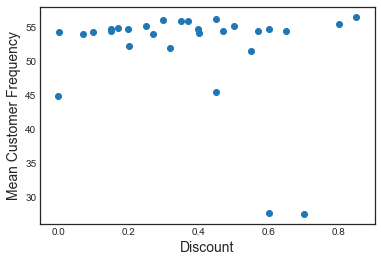

In [5]:
# customer_id vs discount

"""
    Let's find the mean frequency of 
    clients' orders for each discount rate
"""

n_customers = df['Customer ID'].nunique()
n_discount = df['Discount'].nunique()

temp = np.unique(df['Customer ID'], return_counts=True)
customer_freq = dict(zip(temp[0], temp[1]))
 
temp = np.unique(df['Discount'], return_counts=True)
disc_freq = dict(zip(temp[0], temp[1]))

disc_count = dict(zip(temp[0], np.zeros(n_discount)))

for i in range(len(df)):
    c = df.iloc[i, 3]
    d = df.iloc[i, 12]
    
    disc_count[d] += customer_freq[c]

counts = np.array(list(disc_count.values()), dtype=int)
freq = np.array(list(disc_freq.values()), dtype=int)

mean_freq = counts / freq

plt.scatter(list(disc_count.keys()), mean_freq)
plt.xlabel('Discount')
plt.ylabel('Mean Customer Frequency');

**There is no correlation between the Mean Customer Frequency and Discount**

In [6]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Country,Market,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,United States,US,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,Australia,APAC,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Australia,APAC,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium


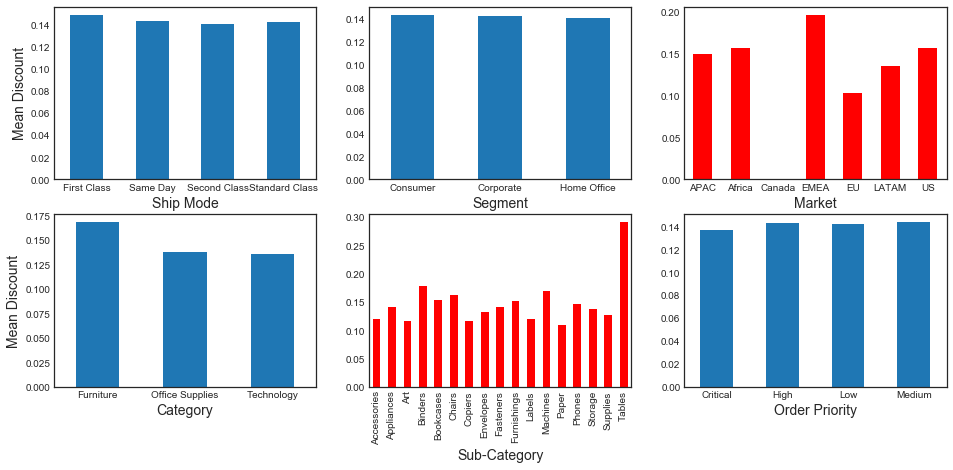

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(16, 7))

df.groupby('Ship Mode')['Discount'].mean().plot.bar(ax=axs[0, 0], ylabel='Mean Discount', rot=0);
df.groupby('Segment')['Discount'].mean().plot.bar(ax=axs[0, 1], rot=0);
df.groupby('Market')['Discount'].mean().plot.bar(ax=axs[0, 2], rot=0, color='red');
df.groupby('Category')['Discount'].mean().plot.bar(ax=axs[1, 0], ylabel='Mean Discount', rot=0);
df.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[1, 1], rot=90, color='red');
df.groupby('Order Priority')['Discount'].mean().plot.bar(ax=axs[1, 2], rot=0);

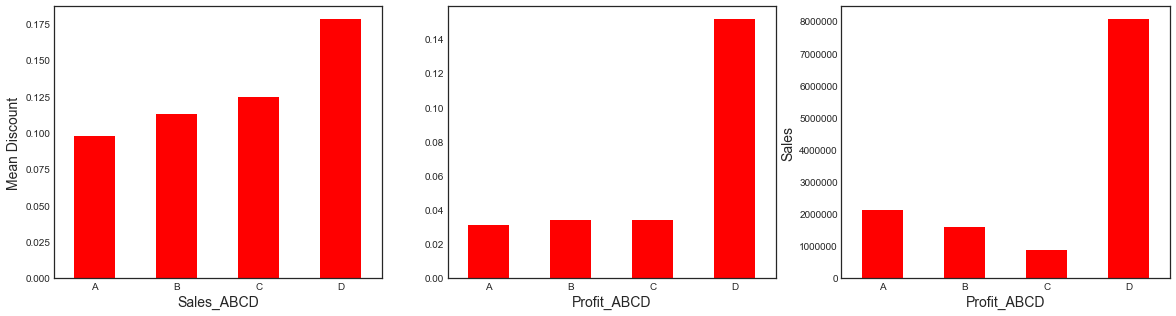

In [8]:
# Sales ABC
def ABCD(p):
    if p < 50:
        return 'A'
    elif p < 80:
        return 'B'
    elif p < 95:
        return 'C'
    return 'D'


def ABCD_analysis(data_frame, col):
    df = data_frame.copy()
    
    total_sum = df[col].sum()
    df['share'] = 100 * df[col] / total_sum
    df = df.sort_values('share', ascending=False)
    df['cumsum'] = df['share'].cumsum()
    data_frame[f'{col}_ABCD'] = df['cumsum'].apply(ABCD)
    
    

ABCD_analysis(df, 'Sales')
ABCD_analysis(df, 'Profit')


fig, axs = plt.subplots(1, 3, figsize=(20, 5))

df.groupby('Sales_ABCD')['Discount'].mean().plot.bar(ax=axs[0], ylabel='Mean Discount', rot=0, color='red');
df.groupby('Profit_ABCD')['Discount'].mean().plot.bar(ax=axs[1], rot=0, color='red');
df.groupby('Profit_ABCD')['Sales'].sum().plot.bar(ax=axs[2],  ylabel='Sales', rot=0, color='red');

In [9]:
df.corr().style.background_gradient(cmap='coolwarm').format('{0:,.1f}')

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.0,0.3,-0.1,0.5,0.8
Quantity,0.3,1.0,-0.0,0.1,0.3
Discount,-0.1,-0.0,1.0,-0.3,-0.1
Profit,0.5,0.1,-0.3,1.0,0.4
Shipping Cost,0.8,0.3,-0.1,0.4,1.0


1. Sales vs Shipping Cost

array([2309.65 , 3709.395, 5175.171, ...,   22.92 ,   13.44 ,   61.38 ])

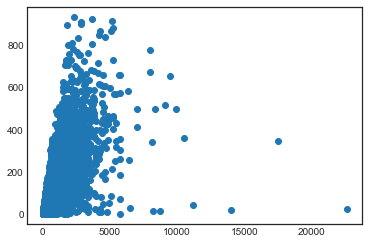

In [10]:
plt.scatter(df['Sales'], df['Shipping Cost'])

from sklearn.linear_model import LinearRegression

x = df['Sales'].values
y = df['Shipping Cost'].values

# lr = LinearRegression()
# model = lr.fit(x, y)
x

In [11]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Country,Market,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales_ABCD,Profit_ABCD
0,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,United States,US,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical,A,A
1,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,Australia,APAC,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical,A,D
2,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Australia,APAC,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium,A,A


## 1. В итоге,

1. Больше всего продаж приносят товары из категории Profit D. 
2. Больше всего скилки на товары из категории Profit D.
3. Больше всего скидки на Sub-Category Tables.
4. Больше всего скидки в Market EMEA
5. Shipping Cost и Sales зависимы 

Можно сделать вывод, что 1 следуют из 2.

## 2. To Do:

1. Разделить profit на <0,  >0 и посмотреть как скидка зависит от этого
2. Как Shipping Cost соотноситься с City / Profit_ABCD / Discount
    Для этого сделать Shipping Cost ABCD
    
3. Shipping Cost и Sales зависимы. Как ? 
4. Проанализировать почему Profit < 0
5. Как это соотносится с локацией (Market, Country, City) / Shipping Cost / Discount (см 1.1)
6. Посмотреть корреляцию Profit

### Тема = Идея как увеличить профит ? 

## 2.1 
### Разделить profit на <0,  >0 и посмотреть как скидка зависит от этого

In [12]:
df['isProfitPos'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Country,Market,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales_ABCD,Profit_ABCD,isProfitPos
0,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,United States,US,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical,A,A,1
1,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,Australia,APAC,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical,A,D,0
2,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Australia,APAC,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium,A,A,1
3,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Berlin,Germany,EU,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium,A,D,0
4,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Dakar,Senegal,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical,A,B,1


In [13]:
df.corr().style.background_gradient(cmap='coolwarm').format('{0:,.1f}')

,Sales,Quantity,Discount,Profit,Shipping Cost,isProfitPos
Sales,1.0,0.3,-0.1,0.5,0.8,0.1
Quantity,0.3,1.0,-0.0,0.1,0.3,0.0
Discount,-0.1,-0.0,1.0,-0.3,-0.1,-0.8
Profit,0.5,0.1,-0.3,1.0,0.4,0.3
Shipping Cost,0.8,0.3,-0.1,0.4,1.0,0.1
isProfitPos,0.1,0.0,-0.8,0.3,0.1,1.0


1. Sign of the Profit depends on Discount. The Correlation is -0.8
2. Shipping Cost depends on Sales

## 2.2
### Как Shipping Cost соотноситься с City / Profit_ABCD / Discount
###  Для этого сделать Shipping Cost ABCD

In [27]:
ABCD_analysis(df, 'Shipping Cost')

df.groupby('Shipping Cost_ABCD')

In [28]:
test_df = pd.get_dummies(df['Shipping Cost_ABCD'])
test_df[['Sales', 'Q', 'Discount', 'Profit', 'ProfPos']] = df[['Sales', 'Quantity',
                                                               'Discount', 'Profit', 'isProfitPos']]
test_df.corr().style.background_gradient(cmap='coolwarm').format('{0:,.1f}')

,A,B,C,D,Sales,Q,Discount,Profit,ProfPos
A,1.0,-0.1,-0.2,-0.3,0.6,0.2,-0.1,0.3,0.0
B,-0.1,1.0,-0.3,-0.4,0.2,0.2,-0.1,0.1,0.0
C,-0.2,-0.3,1.0,-0.6,-0.1,0.1,-0.1,-0.1,0.0
D,-0.3,-0.4,-0.6,1.0,-0.4,-0.3,0.1,-0.1,-0.1
Sales,0.6,0.2,-0.1,-0.4,1.0,0.3,-0.1,0.5,0.1
Q,0.2,0.2,0.1,-0.3,0.3,1.0,-0.0,0.1,0.0
Discount,-0.1,-0.1,-0.1,0.1,-0.1,-0.0,1.0,-0.3,-0.8
Profit,0.3,0.1,-0.1,-0.1,0.5,0.1,-0.3,1.0,0.3
ProfPos,0.0,0.0,0.0,-0.1,0.1,0.0,-0.8,0.3,1.0


## ProfitSign -> Discount -> [Sub_Cat, Market, Country]

In [ ]:
df.head()

In [29]:
# total profit
print(f' Total Profit: {df.Profit.sum()}')
df.corr().style.background_gradient(cmap='coolwarm').format('{0:,.1f}')

 Total Profit: 1467457.2912800002


,Sales,Quantity,Discount,Profit,Shipping Cost,isProfitPos
Sales,1.0,0.3,-0.1,0.5,0.8,0.1
Quantity,0.3,1.0,-0.0,0.1,0.3,0.0
Discount,-0.1,-0.0,1.0,-0.3,-0.1,-0.8
Profit,0.5,0.1,-0.3,1.0,0.4,0.3
Shipping Cost,0.8,0.3,-0.1,0.4,1.0,0.1
isProfitPos,0.1,0.0,-0.8,0.3,0.1,1.0


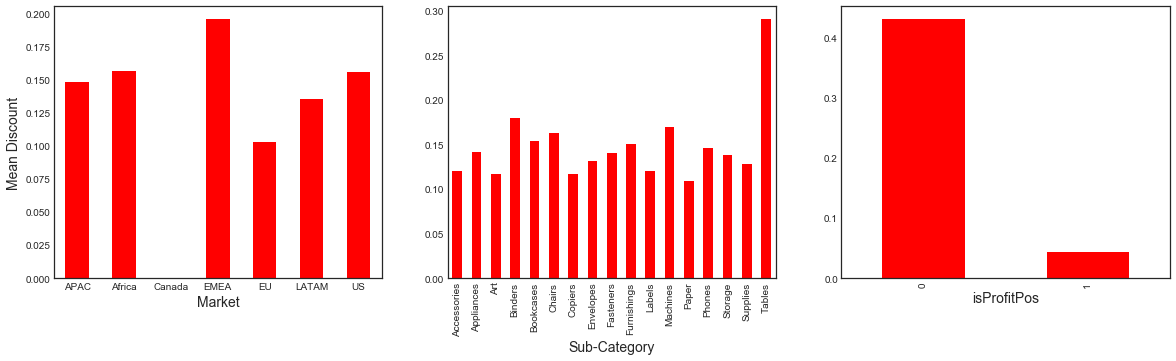

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

df.groupby('Market')['Discount'].mean().plot.bar(ax=axs[0], ylabel='Mean Discount', rot=0, color='red');
df.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[1], rot=90, color='red');
df.groupby('isProfitPos')['Discount'].mean().plot.bar(ax=axs[2], rot=90, color='red');
axs[1].plot(df['Discount'].mean());

## Markets and their discount and profit

In [31]:
mean_prof_per_order = df['Profit'].mean()

temp = df.groupby('Market')['Profit'].sum()

markets = pd.DataFrame(temp)
markets['Sales'] = df.groupby('Market')['Sales'].sum().values
markets['Discount'] = df.groupby('Market')['Discount'].mean().values
markets['Ship_Cost'] = df.groupby('Market')['Shipping Cost'].mean().values
markets['n_orders'] = df.groupby('Market')['Market'].count().values

markets.sort_values('Profit', inplace=True)

markets['prof_per_order'] = markets['Profit'] / markets['n_orders']

mean_disc = df['Discount'].mean()
print(mean_prof_per_order)
markets['high_discount'] = markets['Discount'].apply(lambda x: 1 if x > mean_disc else 0)

markets['Sales'].astype(np.int)

28.61098247767587


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Market
Canada      66928
EMEA       806161
Africa     783773
LATAM     2164605
US        2297200
EU        2938089
APAC      3585744
Name: Sales, dtype: int64

In [32]:
markets.corr().style.background_gradient(cmap='coolwarm').format('{0:,.3f}')

,Profit,Sales,Discount,Ship_Cost,n_orders,prof_per_order,high_discount
Profit,1.000,0.987,0.204,0.948,0.891,0.370,0.031
Sales,0.987,1.000,0.311,0.920,0.937,0.249,0.060
Discount,0.204,0.311,1.000,0.030,0.500,-0.790,0.721
Ship_Cost,0.948,0.920,0.030,1.000,0.727,0.537,-0.030
n_orders,0.891,0.937,0.500,0.727,1.000,-0.030,0.101
prof_per_order,0.370,0.249,-0.790,0.537,-0.030,1.000,-0.445
high_discount,0.031,0.060,0.721,-0.030,0.101,-0.445,1.000


## Subcategories in the world

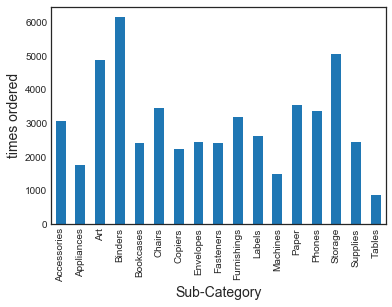

In [36]:
df.groupby('Sub-Category')['Sub-Category'].count().plot.bar(ylabel='times ordered');

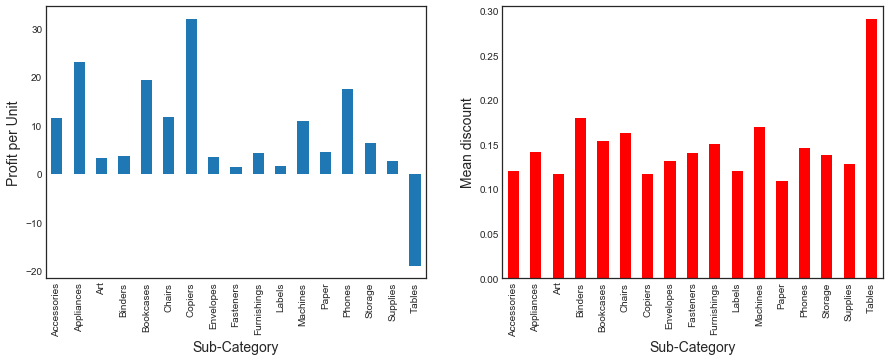

In [37]:
df['per_unit_prof'] = df['Profit'] / df['Quantity']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

df.groupby('Sub-Category')['per_unit_prof'].mean().plot.bar(ax=axs[0], ylabel='Profit per Unit')
df.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[1], rot=90, color='red', ylabel='Mean discount');

## What if we lower the discount on the EMEA Market ?

Then let's assume we lose part of the customers of this market.
1. What is the total profit on the market? 

In [38]:
temp = df[df['Market']=='EMEA']['Profit'].sum()
print(f'Profit on EMEA Market: {round(temp, 2)}')

Profit on EMEA Market: 43897.97


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


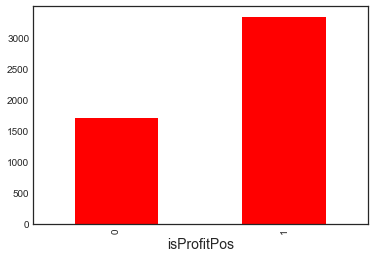

In [39]:
emea = df[df['Market']=='EMEA']
emea.groupby('isProfitPos')['Profit'].count().plot.bar(rot=90, color='red')
emea['per_unit_prof'] = emea['Profit'] / emea['Quantity']

What products are most popular on EMEA?

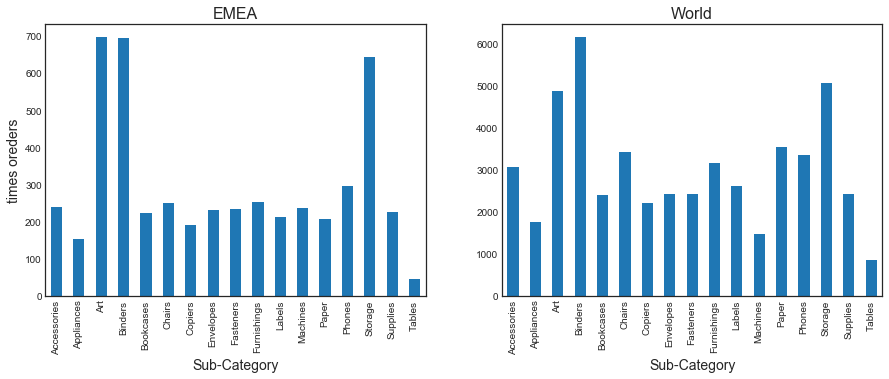

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

emea.groupby('Sub-Category')['Sub-Category'].count().plot.bar(ax=axs[0], ylabel='times oreders', title='EMEA')
df.groupby('Sub-Category')['Sub-Category'].count().plot.bar(ax=axs[1], title='World')

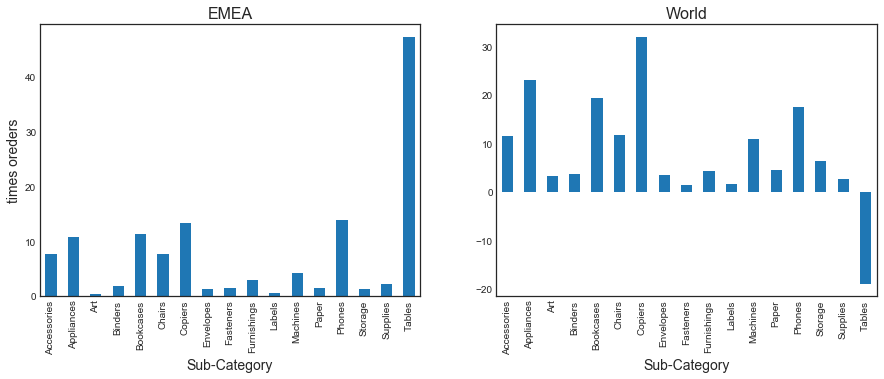

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

emea.groupby('Sub-Category')['per_unit_prof'].mean().plot.bar(ax=axs[0], ylabel='times oreders', title='EMEA')
df.groupby('Sub-Category')['per_unit_prof'].mean().plot.bar(ax=axs[1], title='World')

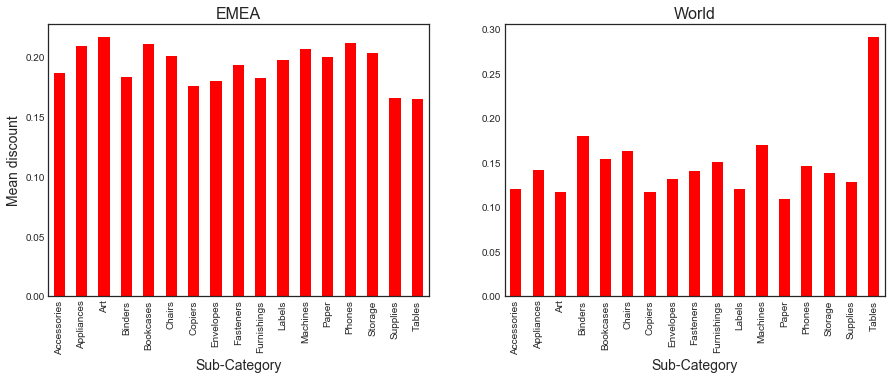

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

emea.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[0], rot=90, color='red',
                                                         ylabel='Mean discount', title='EMEA')
df.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[1], rot=90, color='red', title='World');

## Lets look at the countries and their average discount and their profit

There are 147 countries. In 29 of them, there is a negative Profit

In [44]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Country,Market,Category,Sub-Category,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales_ABCD,Profit_ABCD,isProfitPos,Shipping Cost_ABCD,per_unit_prof
0,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,United States,US,Technology,Accessories,...,7,0.0,762.1845,933.57,Critical,A,A,1,A,108.8835
1,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,Australia,APAC,Furniture,Chairs,...,9,0.1,-288.7650,923.63,Critical,A,D,0,A,-32.0850
2,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Australia,APAC,Technology,Phones,...,9,0.1,919.9710,915.49,Medium,A,A,1,A,102.2190


In [108]:
temp = df.groupby('Country')['Profit'].sum()

countries = pd.DataFrame(temp)
countries['Discount'] = df.groupby('Country')['Discount'].mean().values
countries['Ship_Cost'] = df.groupby('Country')['Shipping Cost'].mean().values

countries.sort_values('Profit', inplace=True)

mean_disc = df['Discount'].mean()
print(mean_disc)
countries['high_discount'] = countries['Discount'].apply(lambda x: 1 if x > mean_disc else 0)

countries['isProfPos'] = countries['Profit'].apply(lambda x: 1 if x > 0 else 0)

countries.head(29)

0.14290754533046268


,Profit,Discount,Ship_Cost,high_discount,isProfPos
Country,,,,,
Turkey,-98447.23200,0.600000,8.464557,1,0
Nigeria,-80750.71800,0.700000,6.832166,1,0
Netherlands,-41070.07500,0.481839,20.702874,1,0
Honduras,-29482.37140,0.406833,13.564498,1,0
Pakistan,-22446.64800,0.444578,23.426064,1,0
Argentina,-18693.79672,0.433210,16.324005,1,0
Panama,-17723.45248,0.406299,13.958853,1,0
Sweden,-17519.36700,0.507882,15.953251,1,0
Philippines,-16128.22500,0.345888,26.259192,1,0


In [74]:
bad_countries = list(countries.index[:29])

profit = df['Profit'].sum()

# на каких рынках эти страны
markets = []
for c in bad_countries:
    for i in range(len(df)):
        if df.iloc[i, 6] == c:
            markets.append(df.iloc[i, 7])
            break
print(markets)

['EMEA', 'Africa', 'EU', 'LATAM', 'APAC', 'LATAM', 'LATAM', 'EU', 'APAC', 'APAC', 'LATAM', 'EMEA', 'EU', 'LATAM', 'EU', 'APAC', 'EMEA', 'LATAM', 'Africa', 'EU', 'LATAM', 'EMEA', 'EMEA', 'Africa', 'APAC', 'APAC', 'EMEA', 'APAC', 'EMEA']


<BarContainer object of 5 artists>

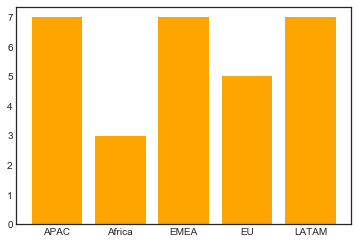

In [75]:
markets = np.unique(markets, return_counts=True)
plt.bar(markets[0], markets[1], color='orange')

In [105]:
bad_countries = np.array(bad_countries)
good_countries = df[~df['Country'].isin(bad_countries)]
(good_countries['Profit'].sum() - profit) / profit

0.30522160311004076

In [46]:
countries.tail(3)

,Profit,Discount,Ship_Cost,high_discount,isProfPos
Country,,,,,
India,129071.8350,0.017685,39.730367,0,1
China,150683.0850,0.014309,41.998415,0,1
United States,286397.0217,0.156203,23.831678,1,1


In [47]:
countries.corr().style.background_gradient(cmap='coolwarm').format('{0:,.3f}')

,Profit,Discount,Ship_Cost,high_discount,isProfPos
Profit,1.000,-0.255,0.104,-0.145,0.339
Discount,-0.255,1.000,-0.289,0.905,-0.929
Ship_Cost,0.104,-0.289,1.000,-0.247,0.272
high_discount,-0.145,0.905,-0.247,1.000,-0.904
isProfPos,0.339,-0.929,0.272,-0.904,1.000


### The most common goods in the countries with negative Profit vs positive Profit

In [ ]:
countries.group

### Look at Turkey for example 

In [48]:
turkey = df[df['Country'] == 'Turkey']

temp = pd.DataFrame(turkey.groupby('City')['Profit'].mean())
temp.sort_values('Profit', ascending=False).head()

,Profit
City,
Felahiye,-0.702
Afyon,-6.432
Cubuk,-6.933
Aydin,-9.382
Ardahan,-10.776


### All cities in Turkey bring negative profit

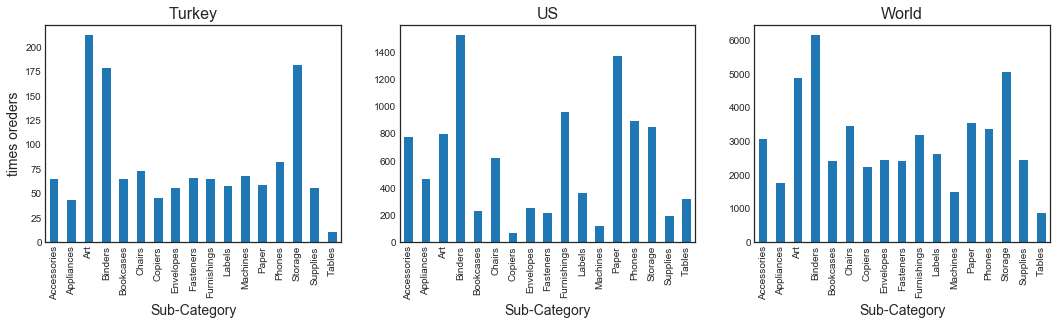

In [49]:
us = df[df['Country'] == 'United States']

fig, axs = plt.subplots(1, 3, figsize=(18, 4))


turkey.groupby('Sub-Category')['Sub-Category'].count().plot.bar(ax=axs[0], ylabel='times oreders', title='Turkey')
us.groupby('Sub-Category')['Sub-Category'].count().plot.bar(ax=axs[1], title='US')
df.groupby('Sub-Category')['Sub-Category'].count().plot.bar(ax=axs[2], title='World')

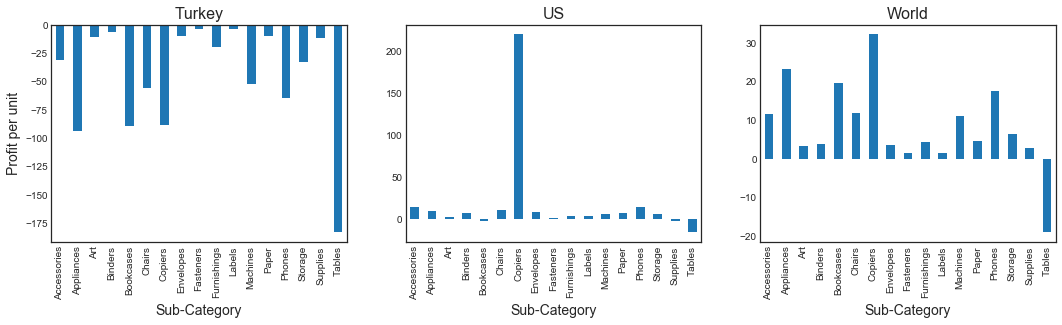

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

turkey.groupby('Sub-Category')['per_unit_prof'].mean().plot.bar(ax=axs[0], ylabel='Profit per unit', title='Turkey')
us.groupby('Sub-Category')['per_unit_prof'].mean().plot.bar(ax=axs[1], title='US')
df.groupby('Sub-Category')['per_unit_prof'].mean().plot.bar(ax=axs[2], title='World');

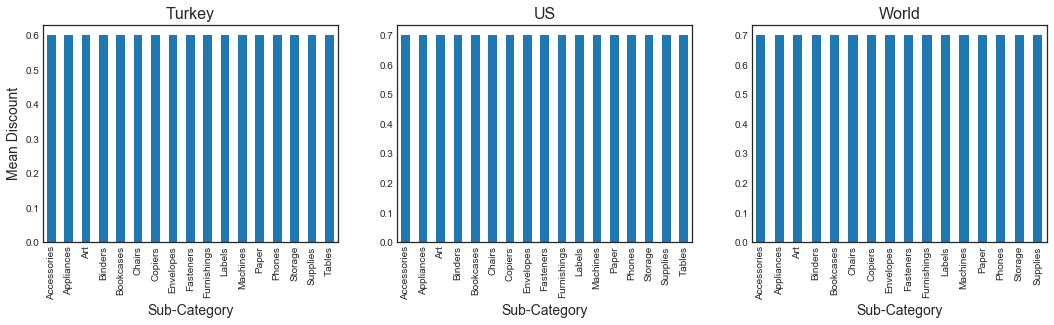

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

li = us = df[df['Country'] == 'Lithuania']
kh = us = df[df['Country'] == 'Kazakhstan']

turkey.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[0], ylabel='Mean Discount', title='Turkey')
li.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[1], title='US')
kh.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[2], title='World');

## What if we lower the discounts ?

In [ ]:
temp = pd.DataFrame(df[df['Market'] == 'EMEA'].groupby('Country')['Profit'].sum())
temp = temp.sort_values('Profit')
temp.head()

In [ ]:
li = df[df['Country'] == 'Turkey']

li.groupby('Sub-Category')['Discount'].mean().plot.bar(ylabel='times oreders', title='Turkey')

In [ ]:
li